<a href="https://colab.research.google.com/github/SameerShafayet/Pytorch/blob/main/PC_parts_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download("https://www.kaggle.com/datasets/asaniczka/pc-parts-images-dataset-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sameershafayetlatif
Your Kaggle Key: ··········


100%|██████████| 34.0M/34.0M [00:00<00:00, 110MB/s] 


In [ ]:
# Path to the main dataset folder
dataset_path = '/content/pc_parts_main/pc_parts'

# Create folders for train and test sets
train_path = '/content/pc_parts_main/pc_parts/train'
test_path = '/content/pc_parts_main/pc_parts/test'

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [ ]:
# Move the 14 class folders to train and test folders
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):
        # Get a list of images for this class
        images = [img for img in os.listdir(class_path) if img.endswith(".jpg")]

        # Ensure there are enough samples for both train and test sets
        if len(images) >= 2:
            # Split the images into train and test sets
            train_images, test_images = train_test_split(images, train_size=0.8, test_size=0.2, random_state=42)

            # Move images to train folder
            for img in train_images:
                src_path = os.path.join(class_path, img)
                dest_path = os.path.join(train_path, class_folder, img)
                os.makedirs(os.path.join(train_path, class_folder), exist_ok=True)
                shutil.move(src_path, dest_path)

            # Move images to test folder
            for img in test_images:
                src_path = os.path.join(class_path, img)
                dest_path = os.path.join(test_path, class_folder, img)
                os.makedirs(os.path.join(test_path, class_folder), exist_ok=True)
                shutil.move(src_path, dest_path)

            # Remove the original class folder from pc_parts
            shutil.rmtree(class_path)

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to a consistent size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values
])

In [ ]:
# Create ImageFolder datasets
train_data = datasets.ImageFolder(root=train_path, transform=transform)
test_data = datasets.ImageFolder(root=test_path, transform=transform)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 2616
    Root location: /content/pc_parts_main/pc_parts/train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 663
    Root location: /content/pc_parts_main/pc_parts/test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
# Creating a small batch size for images - lets say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
# nn.Conv2d(input_size, no_of_filters/outputs/feature maps, kernel_size, slide no of times)
conv1 = nn.Conv2d(3,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)
# conv3 = nn.Conv2d(16,16,5,1)
# conv4 = nn.Conv2d(16,26,5,1)

In [ ]:
for i, (X_Train, y_train) in enumerate(train_data): #assigns it to the variables X_Train and y_train, and then exits the loop
  break

In [ ]:
X_Train.shape

torch.Size([3, 32, 32])

In [ ]:
x = X_Train.view(1,3,32,32)

In [ ]:
# Perform our 1st convolution
x = F.relu(conv1(x))

In [ ]:
x

tensor([[[[0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783],
          [0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783],
          [0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783],
          ...,
          [0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783],
          [0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783],
          [0.1783, 0.1783, 0.1783,  ..., 0.1783, 0.1783, 0.1783]],

         [[0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904],
          [0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904],
          [0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904],
          ...,
          [0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904],
          [0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904],
          [0.5904, 0.5904, 0.5904,  ..., 0.5904, 0.5904, 0.5904]],

         [[0.7540, 0.7540, 0.7540,  ..., 0.7540, 0.7540, 0.7540],
          [0.7540, 0.7540, 0.7540,  ..., 0.7540, 0.7540, 0.7540],
          [0.7540, 0.7540, 0.7540,  ..., 0

In [ ]:
x.shape

torch.Size([1, 6, 30, 30])

In [ ]:
# pass through the pooling layer
x = F.max_pool2d(x,2,2) #kernel size = 2, stride = 2

In [ ]:
x.shape

torch.Size([1, 6, 15, 15])

In [ ]:
x = F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 13, 13])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 6, 6])

In [ ]:
# x = F.relu(conv3(x))

In [ ]:
# x.shape

In [ ]:
# x = F.max_pool2d(x,2,2)

In [ ]:
# x.shape

In [ ]:
# x = F.relu(conv4(x))

In [ ]:
# x.shape

In [ ]:
# x = F.max_pool2d(x,2,2)

In [ ]:
# x.shape

In [ ]:
# Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # self.conv3 = nn.Conv2d(16,16,5,1)
    # self.conv4 = nn.Conv2d(16,26,5,1)

    # Fully connected layer
    self.fc1 = nn.Linear(16*6*6, 120) # Flatten to 120 neurons (arbitrary value)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 14) # 14 because 14 classes

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride=2
    # when we pool we are taking data away

    # 2nd Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride=2

    # 2nd Pass
    # X = F.relu(self.conv3(X))
    # X = F.max_pool2d(X,2,2) # 2x2 kernel and stride=2

    # Re-View to flatten it out
    X = X.view(-1, 16*6*6) # -1 so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [ ]:
# Create an instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=14, bias=True)
)

In [ ]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

 # Create some variables for tracking
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

 # For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened. It is 2d
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1] # add up the number of correct predictions. Indexed off the 1st point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print out results
    if b%100 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss.detach().numpy())
  train_correct.append(trn_corr.detach().numpy())

  # Test
  with torch.no_grad(): # No gradient so that we dont update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and do sum


  loss = criterion(y_val,y_test)
  test_losses.append(loss.detach().numpy())
  test_correct.append(tst_corr.detach().numpy())


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!!')

Epoch: 0 Batch: 100 Loss: 2.7335410118103027
Epoch: 0 Batch: 200 Loss: 2.308000326156616
Epoch: 1 Batch: 100 Loss: 2.4610650539398193
Epoch: 1 Batch: 200 Loss: 2.3763959407806396
Epoch: 2 Batch: 100 Loss: 2.6877119541168213
Epoch: 2 Batch: 200 Loss: 2.1846349239349365
Epoch: 3 Batch: 100 Loss: 2.746981143951416
Epoch: 3 Batch: 200 Loss: 2.447472095489502
Epoch: 4 Batch: 100 Loss: 2.1487486362457275
Epoch: 4 Batch: 200 Loss: 2.2789838314056396
Training Took: 0.47914302349090576 minutes!!


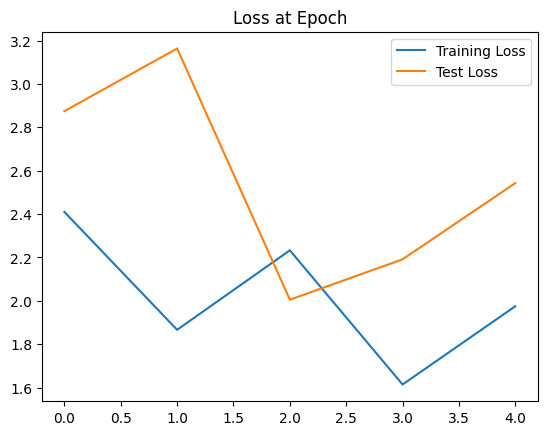

In [ ]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss at Epoch")
plt.legend()

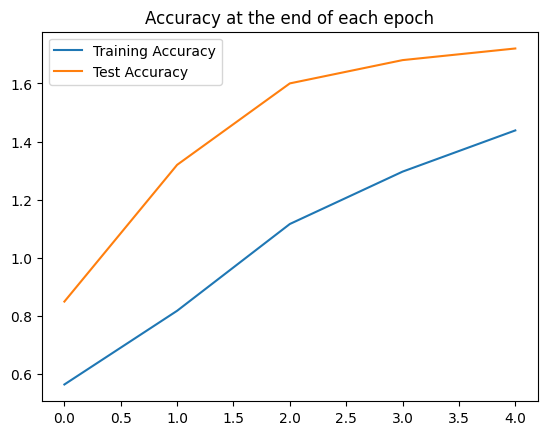

In [ ]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Test Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
# Test for correct
(correct.item()/len(test_data)) * 100

25.94268476621418

In [ ]:
test_data[100]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 1)

In [ ]:
test_data[100][0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])